# TP 1 : Regex Matplotlib Wikipedia

Durant chaque TP, vous pourrez travailler directement sur le notebook fourni ou dans un répertoire que vous devez créer. Si vous choisissez de travailler sur des fichier python classiques, vous recopierez les codes écrits dans le notebook avant de le déposer sur Moodle.

Plan de ce TP :
1. A l'aide de regex, trouver la liste de toutes les dates écrites dans un document texte.
2. A l'aide de matplotlib faire les graphiques qui analysent la répartition des dates d'un document écrit.
3. A l'aide de l'API Wikipedia, interroger l'encyclopédie sur un sujet et générer l'analyse automatique des dates correspondantes.


**Pensez à commenter vos programmes !**

## Exercice 1 : dates et regex

1. Partie 1

Faites une fonction ```date_naiss(txt)``` qui prend en entrée un texte comportant une date de naissance. Cette fonction doit renvoyer ensuite le tuple de trois entiers au format ```(aaaa, mm, jj)```

2. Partie 2

Faites une deuxième fonction nommée ```infos_date(tuple_date)``` qui prend en entrée le tuple au même format que le retour de la première fonction et affiche les informations concernant cette date de naissance :
- âge de la personne (en années)
- jour de la semaine de la naissance
- distance au prochain anniversaire (en mois et jours)

3. Partie 3

Faites enfin la fonction nommée ```dates_chiffres(txt)``` qui prend en entrée un texte comportant des dates et renvoie la liste de tous les tuples au format ```(aaaa, mm, jj)``` correspondants aux dates contenues dans le texte.


Les dates écrites dans le texte par l'utilisateur doit être vérifiées à l'aide d'une regex, les formats admis sont :
- jj/mm/aaaa ou jj-mm-aaaa ou aaaa-mm-jj ou aaaa/mm/jj ou
- j/mm/aaaa ou j-mm-aaaa ou aaaa-mm-j ou aaaa/mm/j ou
- jj/m/aaaa ou jj-m-aaaa ou aaaa-m-jj ou aaaa/m/jj ou
- j/m/aaaa ou j-m-aaaa ou aaaa-m-j ou aaaa/m/j

ainsi que tous ces formats avec des espaces avant ou après les séparateurs / ou -

L'année doit forcément commencer par un 1 ou un 2 (an > 1000 et <3000).

Ref :
Pour les regex
[https://docs.python.org/3/howto/regex.html](https://docs.python.org/3/howto/regex.html)

Pour les calculs de dates (notamment différences relatives), vous pourrez utiliser les packages "datetime" et "dateutil" :
[https://docs.python.org/3/library/datetime.html](https://docs.python.org/3/library/datetime.html) (doc officielle)
[https://www.programiz.com/python-programming/datetime](https://www.programiz.com/python-programming/datetime) (source plus élémentaire)

[https://dateutil.readthedocs.io/en/stable/](https://dateutil.readthedocs.io/en/stable/) (module dateutil si nécessaire)


**Suggestion** : Faites plusieurs patterns pour cette regex puis compilez la regex en ajoutant les patterns séparés par des pipes "|" pour autoriser le match avec l'un ou l'autre de ces patterns.


### Tests
Code de test :

```
txt = """1 Jan 2051 : début du test
First date is 20-02-2005, found it ?
The second date is 1978/10/2
The third date is 1953 - 8 - 23
this is not a date 2018/42/13
this is not a date 2018/12-13
this is not a date 25/15/2023
The fourth date is 2018/02/13
this is not a date 2225/11/2023
this is not a date 2018-12-32
"""
print(date_naiss(txt))
infos_date(date_naiss(txt))
print(dates_chiffres(txt))
for date in dates_chiffres(txt):
    print("\n")
    infos_date(date)
```

Affiche :

```
(2005, 2, 20)
Date de naissance : 20-2-2005
Âge : 17 ans
Jour de la semaine : dimanche
Distance au prochain anniversaire : 0 mois et 1 jours
[(2005, 2, 20), (1978, 10, 2), (1953, 8, 23), (2018, 2, 13)]


Date de naissance : 20-2-2005
Âge : 17 ans
Jour de la semaine : dimanche
Distance au prochain anniversaire : 0 mois et 1 jours


Date de naissance : 2-10-1978
Âge : 44 ans
Jour de la semaine : lundi
Distance au prochain anniversaire : 7 mois et 13 jours


Date de naissance : 23-8-1953
Âge : 69 ans
Jour de la semaine : dimanche
Distance au prochain anniversaire : 6 mois et 4 jours


Date de naissance : 13-2-2018
Âge : 5 ans
Jour de la semaine : mardi
Distance au prochain anniversaire : 11 mois et 25 jours
```

In [53]:
# TP - 2023 - regex
def date_naiss(text):
    import re
    regexDateNaiss = re.compile(r"(?P<dateFR>\b(?P<jourFR>([0-2]?[0-9])|(3[0-1]))\s*(?P<sepFR>[\-/])\s*(?P<moisFR>(0?[1-9])|(1[0-2]))\s*(?P=sepFR)\s*(?P<anneeFR>[1-2][0-9]{3})\b)|(?P<dateEN>\b(?P<anneeEN>[1-2][0-9]{3})\s*(?P<sepEN>[\-/])\s*(?P<moisEN>(0?[1-9])|(1[0-2]))\s*(?P=sepEN)\s*(?P<jourEN>([0-2]?[0-9])|(3[0-1]))\b)")
    match = regexDateNaiss.search(text)
    # Différenciation des match anglais et français
    if match.group("dateFR"):
        # print("fr")
        annee=match.group("anneeFR")
        mois=match.group("moisFR")
        jour=match.group("jourFR")
    elif match.group("dateEN"):
        # print("en")
        annee=match.group("anneeEN")
        mois=match.group("moisEN")
        jour=match.group("jourEN")
    else:
        return False
    # Conversion en chiffre
    date=(int(annee),int(mois),int(jour))
    return date

def infos_date(date):
    import datetime
    from dateutil import relativedelta
    jours={"Monday":"lundi","Tuesday":"mardi","Wednesday":"mercredi","Thursday":"jeudi","Friday":"vendredi","Saturday":"samedi","Sunday":"dimanche"}
    dtObj = datetime.datetime(*date)
    todayDt = datetime.date.today()
    print(f"Date de naissance : {date[2]}-{date[1]}-{date[0]}")
    print(f"Âge : {relativedelta.relativedelta(todayDt,dtObj).years} ans")
    print("Jour de la semaine : " + jours[dtObj.strftime('%A')])
    annivNext=datetime.date((todayDt.year+1),dtObj.month,dtObj.day)
    dstAnniv=relativedelta.relativedelta(annivNext,todayDt)
    print(f"Distance au prochain anniversaire : {dstAnniv.months} mois et {dstAnniv.days} jours")

def dates_chiffres(text):
    import re
    regexDateNaiss = re.compile(r"(?P<dateFR>\b(?P<jourFR>([0-2]?[0-9])|(3[0-1]))\s*(?P<sepFR>[\-/])\s*(?P<moisFR>(0?[1-9])|(1[0-2]))\s*(?P=sepFR)\s*(?P<anneeFR>[1-2][0-9]{3})\b)|(?P<dateEN>\b(?P<anneeEN>[1-2][0-9]{3})\s*(?P<sepEN>[\-/])\s*(?P<moisEN>(0?[1-9])|(1[0-2]))\s*(?P=sepEN)\s*(?P<jourEN>([0-2]?[0-9])|(3[0-1]))\b)")
    returns=[]
    for match in regexDateNaiss.finditer(text):
        if match.group("dateFR"):
            # print("fr")
            annee=match.group("anneeFR")
            mois=match.group("moisFR")
            jour=match.group("jourFR")
        elif match.group("dateEN"):
            # print("en")
            annee=match.group("anneeEN")
            mois=match.group("moisEN")
            jour=match.group("jourEN")
        date=(int(annee),int(mois),int(jour))
        returns.append(date)
    return returns
txt = """1 Jan 2051 : début du test
First date is 20-02-2005, found it ?
First date is 12-12-2018
The second date is 1978/10/2
The third date is 1953 - 8 - 23
this is not a date 2018/42/13
this is not a date 2018/12-13
this is not a date 25/15/2023
The fourth date is 2018/02/13
this is not a date 2225/11/2023
this is not a date 2018-12-32
"""
print(date_naiss(txt))
infos_date(date_naiss(txt))
print(dates_chiffres(txt))
for date in dates_chiffres(txt):
    print("\n")
    infos_date(date)


(2005, 2, 20)
Date de naissance : 20-2-2005
Âge : 18 ans
Jour de la semaine : dimanche
Distance au prochain anniversaire : 8 mois et 18 jours
[(2005, 2, 20), (2018, 12, 12), (1978, 10, 2), (1953, 8, 23), (2018, 2, 13)]


Date de naissance : 20-2-2005
Âge : 18 ans
Jour de la semaine : dimanche
Distance au prochain anniversaire : 8 mois et 18 jours


Date de naissance : 12-12-2018
Âge : 4 ans
Jour de la semaine : mercredi
Distance au prochain anniversaire : 6 mois et 10 jours


Date de naissance : 2-10-1978
Âge : 44 ans
Jour de la semaine : lundi
Distance au prochain anniversaire : 4 mois et 0 jours


Date de naissance : 23-8-1953
Âge : 69 ans
Jour de la semaine : dimanche
Distance au prochain anniversaire : 2 mois et 21 jours


Date de naissance : 13-2-2018
Âge : 5 ans
Jour de la semaine : mardi
Distance au prochain anniversaire : 8 mois et 11 jours


## Exercice 2 : Dates et Graphiques

1. Partie 1

Ecrivez une fonction ```all_dates(txt)``` qui reprend la structure de la fonction ```dates_chiffres(txt)``` en améliorant les regex utilisées da façon à :
- détecter les dates aux formats précédents aussi quand les mois sont écrits **en toutes lettres** (voir liste des noms de mois autorisés) en **majuscules et/ou minuscules**
- détecter le format supplémentaire (anglais) : "mois dd, yyyy" ou "dd mois yyyy" où "mois" est en toutes lettres

Indication (listes des mots pour les mois) :
```
engMonth = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
engLongMonth = ["January","February","March","April","May","June","July","August","September","October","November","December"]
frMonth = ["janvier","février","mars","avril","mai","juin","juillet","août","septembre","octobre","novembre","décembre"]
```

2. Partie 2

En reprenant le travail de l'exercice 1, faites une fonction nommée ```stat_dates(txt, type_graph="")``` qui prend en entrée un texte et le type de graphique voulu, et en sortie la fonction renvoie les données nécessaires au graphique demandé parmi :
- type_graph="mois" : Un graphique en barres, présentant le nombre de dates par mois de l'année
- type_graph="joursem" : De même, le graphique qui donne les dates par jour de la semaine
- type_graph="saison" : Enfin, le diagramme en secteur en fonction de la saison : Hiver, Automne, Eté et Printemps

Les données seront retournées sous forme du tuple ```(liste_abscisses, liste_ordonnees)``` pour pouvoir être exploitées par ```matplotlib```

3. Partie 3

Faites la fonction ```draw_graph(txt, type_graph, is_file=False, form_graph="bar", filename="")``` qui prend en entrée une chaîne de caractères, le type de graphique et le booléen is_file qui vaut True si la chaîne de caractère désigne un fichier. Si c'est un fichier la fonction lit le contenu du fichier, sinon elle considère le texte en entrée tout simplement.
L'argument ```form_graph``` peut être ```bar``` ou ```pie``` suivant qu'on veut un graphique en barres ou en secteurs.
L'argument ```filename```, s'il est non vide, désigne le nom du fichier sous lequel enregistrer l'image.
Cette fonction doit produire un graphique et l'enregistrer éventuellement sous la forme d'une image au format ".png".

Pour les graphiques, vous utiliserez la bibliothèque matplotlib
[https://matplotlib.org/stable/users/index.html](https://matplotlib.org/stable/users/index.html)
[https://matplotlib.org/stable/gallery/index.html](https://matplotlib.org/stable/gallery/index.html)

### Tests 

Code de test
```
txt = """"1 Jan 2051 : début du test
First date is 12-12-2018
The second date is 1978/10/2
The third date is 1953 - 8 - 23
this is not a date 2018/42/13
this is not a date 2018/12-13
this is not a date 25/15/2023
The fourth date is 2018/02/13
this is not a date 2225/11/2023
this is not a date 2018-12-32
Louis XVI, né le 23 août 1754 à Versailles sous le nom de Louis-Auguste de France et mort guillotiné le 21 janvier 1793 à Paris, est roi de France et de Navarre du 10 mai 1774 au 6 novembre 1789, puis roi des Français jusqu’au 21 septembre 1792. Il est le dernier roi de France de la période dite de l'Ancien Régime.
Fils du dauphin Louis de France et de Marie-Josèphe de Saxe, il devient dauphin à la mort de son père. Marié en 1770 à Marie-Antoinette d'Autriche, il monte sur le trône en 1774, à dix-neuf ans, à la mort de son grand-père Louis XV.
Héritant un royaume au bord de la banqueroute, il lance plusieurs réformes financières, notamment portées par les ministres Turgot, Calonne et Necker, comme le projet d'un impôt direct égalitaire, mais qui échouent toutes face au blocage des parlements, du clergé, de la noblesse et de la cour. Il fait évoluer le droit des personnes (abolition de la torture, du servage, etc.) et remporte une grande victoire militaire face à l'Angleterre, à travers son soutien actif aux indépendantistes américains. Mais l'intervention française en Amérique achève de ruiner le royaume.
Le changement commence le 2 juin 1774 par la démission du duc d'Aiguillon, Secrétaire d'État de la Guerre et des Affaires étrangères. Loin de l'exiler comme le veut la coutume, le roi lui alloue la somme de 500 000 francs. 
Jones, having left Blues Incorporated, advertised for bandmates in Jazz Weekly the week of 2 May 1962.[9] Ian Stewart was among the first to respond to the ad.[9]
The American Revolutionary War (April 19, 1775 – September 3, 1783), also known as the Revolutionary War or American War of Independence, was a major war of the American Revolution. Widely considered as the war that secured the independence of the United States, fighting began on April 19, 1775, followed by the Lee Resolution on July 2, 1776, and the Declaration of Independence on July 4, 1776. The American Patriots were supported by the Kingdom of France and, to a lesser extent, the Kingdom of Spain and the Dutch Republic, in a conflict taking place in North America, the Caribbean, and the Atlantic Ocean.
London's Oldest Prehistoric Structure. BAJR. 2018-07-06. URL:http://www.bajrfed.co.uk/bajrpress/londons-oldest-prehistoric-structure/. Accessed: 2018-07-06.
Major Cities in the Middle Ages | Middle Ages". thefinertimes.com. Retrieved 13 June 2015.
"""
print(all_dates(txt))
print(stat_dates(txt, "mois"))
print(stat_dates(txt, "joursem"))
print(stat_dates(txt, "saison"))
mm = draw_graph(txt, "mois")
js = draw_graph(txt, "joursem")
sa = draw_graph("wikipages.txt", "saison", is_filename=True, form_graph="pie", filename="saison.png")
```

Doit afficher :
```
[(2051, 1, 1), (2018, 12, 12), (1978, 10, 2), (1953, 8, 23), (2018, 2, 13), (1754, 8, 23), (1793, 1, 21), (1774, 5, 10), (1789, 11, 6), (1792, 9, 21), (1774, 6, 2), (1962, 5, 2), (1775, 4, 19), (1783, 9, 3), (1775, 4, 19), (1776, 7, 2), (1776, 7, 4), (2018, 7, 6), (2018, 7, 6), (2015, 6, 13)]
nombre de dates trouvées : 20
(['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre'], [2, 1, 0, 2, 2, 2, 4, 2, 2, 1, 1, 1])
nombre de dates trouvées : 20
(['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'], [2, 3, 5, 2, 5, 1, 2])
nombre de dates trouvées : 20
(['Hiver', 'Printemps', 'Été', 'Automne'], [3, 6, 7, 4])
```
Et les trois graphiques

[(2051, 1, 1), (2018, 12, 12), (1978, 10, 2), (1953, 8, 23), (2018, 2, 13), (1754, 8, 23), (1793, 1, 21), (1774, 5, 10), (1789, 11, 6), (1792, 9, 21), (1774, 6, 2), (1962, 5, 2), (1775, 4, 19), (1783, 9, 3), (1775, 4, 19), (1776, 7, 2), (1776, 7, 4), (2018, 7, 6), (2018, 7, 6), (2015, 6, 13)]
nombre de dates trouvées : 20
(['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre'], [2, 1, 0, 2, 2, 2, 4, 2, 2, 1, 1, 1])
nombre de dates trouvées : 20
(['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'], [2, 3, 5, 2, 5, 1, 2])
nombre de dates trouvées : 20
(['Hiver', 'Printemps', 'Eté', 'Autonme'], [3, 6, 7, 4])
nombre de dates trouvées : 20
nombre de dates trouvées : 20


C:\Users\partz\AppData\Local\Temp\ipykernel_26136\1746304516.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


nombre de dates trouvées : 989


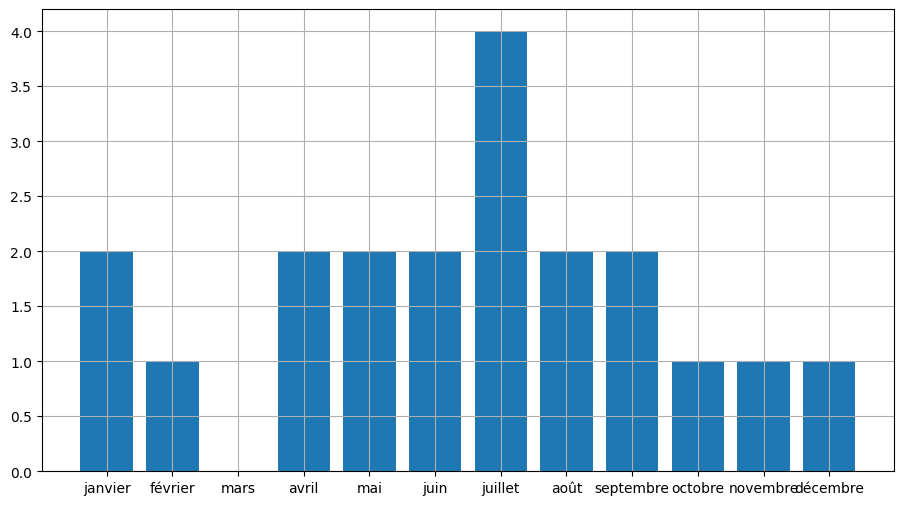

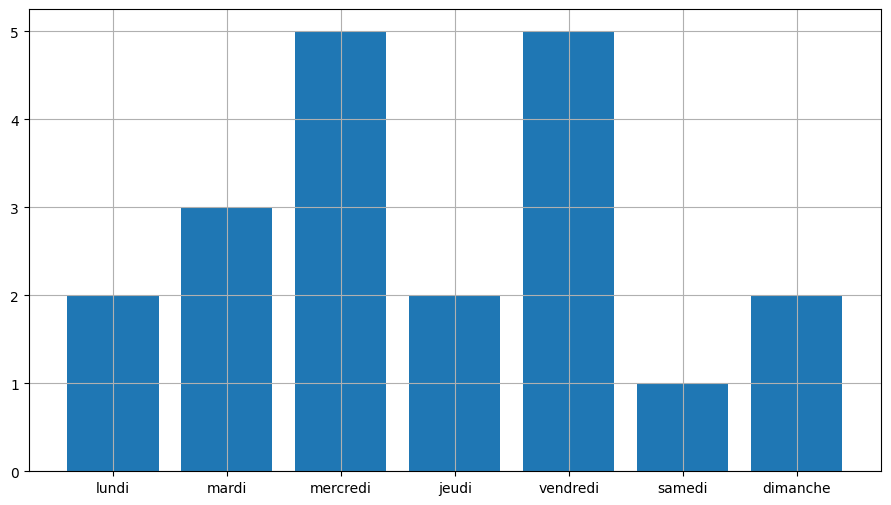

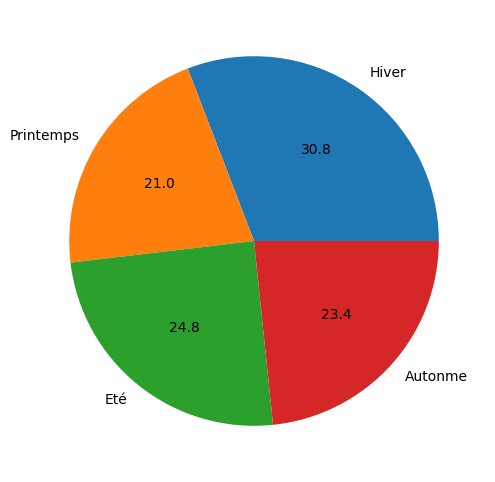

In [78]:
# TP - 2023 - matplotlib
def all_dates(text):
    engMonth = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    engLongMonth = ["January","February","March","April","May","June","July","August","September","October","November","December"]
    frMonth = ["janvier","février","mars","avril","mai","juin","juillet","août","septembre","octobre","novembre","décembre"]
    listes=(engMonth,engLongMonth,frMonth)
    import re
    regexAllDates = re.compile(r"(?P<dateFR>\b(?P<jourFR>([0-2]?[0-9])|(3[0-1]))\s*(?P<sepFR>[\-/])\s*(?P<moisFR>(0?[1-9])|(1[0-2]))\s*(?P=sepFR)\s*(?P<anneeFR>[1-2][0-9]{3})\b)|(?P<dateEN>\b(?P<anneeEN>[1-2][0-9]{3})\s*(?P<sepEN>[\-/])\s*(?P<moisEN>(0?[1-9])|(1[0-2]))\s*(?P=sepEN)\s*(?P<jourEN>([0-2]?[0-9])|(3[0-1]))\b)|(?P<dateLettreFREN>\b(?P<jourLettreFREN>([0-2]?[0-9])|(3[0-1]))\s+(?P<moisLettreFREN>\w+)\s+(?P<anneeLettreFREN>[1-2][0-9]{3})\b)|(?P<dateLettreEN>\b(?P<moisLettreEN>\w+)\s+(?P<jourLettreEN>([0-2]?[0-9])|(3[0-1])),\s+(?P<anneeLettreEN>[1-2][0-9]{3})\b)")
    returns=[]
    
    for match in regexAllDates.finditer(text):
        moisLettre=False
        if match.group("dateFR"):
            # print("fr")
            annee=match.group("anneeFR")
            mois=match.group("moisFR")
            jour=match.group("jourFR")
        elif match.group("dateEN"):
            # print("en")
            annee=match.group("anneeEN")
            mois=match.group("moisEN")
            jour=match.group("jourEN")
        elif match.group("dateLettreFREN"):
            annee=match.group("anneeLettreFREN")
            moisLettre=match.group("moisLettreFREN")
            jour=match.group("jourLettreFREN")
        elif match.group("dateLettreEN"):
            annee=match.group("anneeLettreEN")
            moisLettre=match.group("moisLettreEN")
            jour=match.group("jourLettreEN")
        if moisLettre:
            for liste in listes:
                if moisLettre in liste:
                    mois=liste.index(moisLettre)+1
        date=(int(annee),int(mois),int(jour))
        returns.append(date)
    return returns

def stat_dates(txt,type_graph):
    import matplotlib.pyplot as plt
    import datetime
    frMonth = ["janvier","février","mars","avril","mai","juin","juillet","août","septembre","octobre","novembre","décembre"]
    dates=all_dates(txt)
    print(f"nombre de dates trouvées : {len(dates)}")
    typesAllowed=("mois","joursem","saison")
    if not(type_graph in typesAllowed):
        return False
    if type_graph=="mois":
        nb_mois={"janvier":0,"février":0,"mars":0,"avril":0,"mai":0,"juin":0,"juillet":0,"août":0,"septembre":0,"octobre":0,"novembre":0,"décembre":0}
        # print(len(dates))
        for date in dates:
            nb_mois[frMonth[date[1]-1]]+=1
        return list(nb_mois.keys()),list(nb_mois.values())

    if type_graph=="joursem":
        frDay={"Monday":"lundi","Tuesday":"mardi","Wednesday":"mercredi","Thursday":"jeudi","Friday":"vendredi","Saturday":"samedi","Sunday":"dimanche"}
        nb_jour={"lundi":0,"mardi":0,"mercredi":0,"jeudi":0,"vendredi":0,"samedi":0,"dimanche":0}
        for date in dates:
            dtTemp=datetime.datetime(*date)
            nb_jour[frDay[dtTemp.strftime('%A')]]+=1
        return list(nb_jour.keys()),list(nb_jour.values())

    if type_graph=="saison":
        printemps = range(80, 172)
        ete = range(172, 264)
        automne = range(264, 355)
        nb_saison={"Hiver":0,"Printemps":0,"Eté":0,"Autonme":0}

        for date in dates:
            jourAnnee=datetime.datetime(*date).timetuple().tm_yday
            # print(jourAnnee)
            if jourAnnee in printemps:
                nb_saison["Printemps"]+=1
            elif jourAnnee in ete:
                nb_saison["Eté"]+=1
            elif jourAnnee in automne:
                nb_saison["Autonme"]+=1    
            else:
                nb_saison["Hiver"]+=1
        labels=[]
        sizes=[]
        for label,size in nb_saison.items():
            labels.append(label)
            sizes.append(size)
        return labels,sizes

        
def draw_graph(txt, type_graph, is_filename=False, form_graph="bar", filename=""):
    import matplotlib.pyplot as plt
    if is_filename:
        with open(txt,encoding="utf-8") as f:
            txt=f.read()
    stat=stat_dates(txt,type_graph)
    fig = plt.figure(figsize=(11,6))
    subplot=fig.add_subplot(111)
    if form_graph=="pie":
        subplot.pie(stat[1],labels=stat[0],autopct="%.1f")
    elif form_graph=="bar":
        subplot.bar(range(len(stat[1])),stat[1])
        subplot.grid(visible=True)
        subplot.set_xticks(range(len(stat[0])),stat[0])
    fig.show()
    if filename:
        fig.savefig(filename)
txt = """"
1 Jan 2051 : début du test
First date is 12-12-2018
The second date is 1978/10/2
The third date is 1953 - 8 - 23
this is not a date 2018/42/13
this is not a date 2018/12-13
this is not a date 25/15/2023
The fourth date is 2018/02/13
this is not a date 2225/11/2023
this is not a date 2018-12-32
Louis XVI, né le 23 août 1754 à Versailles sous le nom de Louis-Auguste de France et mort guillotiné le 21 janvier 1793 à Paris, est roi de France et de Navarre du 10 mai 1774 au 6 novembre 1789, puis roi des Français jusqu’au 21 septembre 1792. Il est le dernier roi de France de la période dite de l'Ancien Régime.
Fils du dauphin Louis de France et de Marie-Josèphe de Saxe, il devient dauphin à la mort de son père. Marié en 1770 à Marie-Antoinette d'Autriche, il monte sur le trône en 1774, à dix-neuf ans, à la mort de son grand-père Louis XV.
Héritant un royaume au bord de la banqueroute, il lance plusieurs réformes financières, notamment portées par les ministres Turgot, Calonne et Necker, comme le projet d'un impôt direct égalitaire, mais qui échouent toutes face au blocage des parlements, du clergé, de la noblesse et de la cour. Il fait évoluer le droit des personnes (abolition de la torture, du servage, etc.) et remporte une grande victoire militaire face à l'Angleterre, à travers son soutien actif aux indépendantistes américains. Mais l'intervention française en Amérique achève de ruiner le royaume.
Le changement commence le 2 juin 1774 par la démission du duc d'Aiguillon, Secrétaire d'État de la Guerre et des Affaires étrangères. Loin de l'exiler comme le veut la coutume, le roi lui alloue la somme de 500 000 francs. 
Jones, having left Blues Incorporated, advertised for bandmates in Jazz Weekly the week of 2 May 1962.[9] Ian Stewart was among the first to respond to the ad.[9]
The American Revolutionary War (April 19, 1775 – September 3, 1783), also known as the Revolutionary War or American War of Independence, was a major war of the American Revolution. Widely considered as the war that secured the independence of the United States, fighting began on April 19, 1775, followed by the Lee Resolution on July 2, 1776, and the Declaration of Independence on July 4, 1776. The American Patriots were supported by the Kingdom of France and, to a lesser extent, the Kingdom of Spain and the Dutch Republic, in a conflict taking place in North America, the Caribbean, and the Atlantic Ocean.
London's Oldest Prehistoric Structure. BAJR. 2018-07-06. URL:http://www.bajrfed.co.uk/bajrpress/londons-oldest-prehistoric-structure/. Accessed: 2018-07-06.
Major Cities in the Middle Ages | Middle Ages". thefinertimes.com. Retrieved 13 June 2015.
"""
print(all_dates(txt))
print(stat_dates(txt, "mois"))
print(stat_dates(txt, "joursem"))
print(stat_dates(txt, "saison"))
mm = draw_graph(txt, "mois")
js = draw_graph(txt, "joursem")
# sais = draw_graph(txt,"saison",form_graph="pie")
sa = draw_graph("G:\\git\\r405\\wikipages.txt", "saison", is_filename=True, form_graph="pie", filename="saison.png")


## Exercice 3 : API WikiPedia

Wikipedia a publié une API dédiée. Il faut installer la bibliothèque Wikipedia avec ```pip install wikipedia``` et on peut alors facilement accéder à :

1. La liste des pages correspondant à une recherche
2. Les suggestions si le nom de la recherche est approximatif
3. Le résumé (plus ou moins long au choix)
4. La page recherchée comportant alors : utl ; titre ; résumé ; contenu, références ; html
5. Les images de la page, sous forme d'une liste d'url

Référence :
[https://wikipedia.readthedocs.io/en/latest/code.html](https://wikipedia.readthedocs.io/en/latest/code.html)

[https://stackabuse.com/getting-started-with-pythons-wikipedia-api/](https://stackabuse.com/getting-started-with-pythons-wikipedia-api/)

[https://towardsdatascience.com/wikipedia-api-for-python-241cfae09f1c](https://towardsdatascience.com/wikipedia-api-for-python-241cfae09f1c)

On va se servir de cette API avec les fonctions définies auparavant dans le TP pour automatiquement obtenir les stats sur les dates de pages Wikipedia ou de champ de recherche associés à des mots-clé.

1. Partie 1

Ecrivez une fonction ```get_wiki_page(msg = "Entrez une recherche : ")``` qui prend en entrée le message de "prompt" donné à l'utilisateur.
- Cette fonction doit proposer une page Wikipedia en fonction de l'entrée utilisateur (à l'aide de ```wikipedia.suggest```)
- On demande ensuite à l'utilisateur de confirmer si cette suggestion lui convient. Si ce n'est pas le cas, redemander.
- Si plusieurs pages correspondent et qu'il faut lever l'ambigüité, on propose les choix à l'utilisateur qui doit donner le numéro du choix qui est le bon. S'il ne rentre pas un numéro, retour au prompt initial. (erreur de type : ``` wikipedia.exceptions.DisambiguationError```)
- Si aucune page ne correspond, on écrit une alerte et retour au prompt initial. (erreur de type : ```wikipedia.exceptions.PageError```)
Enfin, on renvoie ensuite le contenu de la page

Cf. doc pour les autres types d'erreur à éventuellement considérer (ex : ```wikipedia.exceptions.HTTPTimeoutError``` etc.).

2. Partie 2

Ecrivez la fonction ```stats_dates_wiki()``` qui appelle la fonction précédente, et présente les trois graphiques des dates mises en jeu... Les deux premiers seront faits en barres tandis que le graphique des saisons sera en "pie".

3. Partie 3

Enfin faites la fonction ```stats_large_search(nb_pages=5)``` qui prend en entrée l'argument facultatif du nombre de pages que l'on souhaite voir figurer dans les stats et retourne les stats des dates des ```nb_pages``` pages wikipedia répondant au prompt.

Exemple de sortie correspondant à la demande "louis XIV" :

```
page trouvée : Louis XIV
page ajoutée : Louis XIV
page trouvée : Descendance de Louis XIV
page ajoutée : Descendance de Louis XIV
page trouvée : Portrait de Louis XIV en costume de sacre
page ajoutée : Portrait de Louis XIV en costume de sacre
page trouvée : Guerres de Louis XIV
page ajoutée : Guerres de Louis XIV
page trouvée : Mort de Louis XIV
page ajoutée : Mort de Louis XIV
page trouvée : Château Louis XIV
page ajoutée : Château Louis XIV
page trouvée : Style Louis XIV
page ajoutée : Style Louis XIV
[(1638, 9, 5), (1643, 5, 14), (1651, 9, 7), (1637, 12, 5), (1638, 9, 5), (1637, 12, 5), (1638, 2, 7), (1638, 9, 5), (1642, 12, 4), (1647, 11, 10), (1658, 6, 30), (1643, 4, 21), (1643, 5, 18), (1649, 12, 25), (1651, 2, 8), (1651, 9, 7), (1653, 10, 22), (1654, 6, 7), (1659, 11, 7), (1660, 6, 9), (1661, 3, 9), (1661, 3, 10), (1661, 9, 5), (1678, 8, 10), (1682, 7, 11), (1714, 7, 29), (1793, 10, 14), (1662, 6, 5), (1643, 5, 18), (1660, 3, 2), (1661, 9, 12), (1656, 4, 27), (1667, 3, 15), (1667, 4, 3), (1658, 6, 23), (1669, 3, 7), (1688, 9, 24), (1691, 4, 10), (1702, 5, 14), (1655, 4, 13), (1716, 5, 2), (1654, 6, 7), (1660, 12, 13), (1598, 4, 13), (1685, 10, 17), (1683, 10, 10), (1711, 4, 14), (1662, 11, 18), (1662, 12, 30), (1664, 11, 16), (1664, 12, 26), (1667, 1, 2), (1668, 8, 5), (1671, 7, 10), (1672, 6, 14), (1672, 11, 4), (1663, 11, 19), (1666, 7, 15), (1665, 1, 7), (1665, 12, 27), (1666, 10, 2), (1739, 5, 3), (1667, 4, 13), (1680, 1, 16), (1667, 10, 3), (1683, 11, 18), (1672, 2, 23), (1670, 3, 31), (1736, 5, 14), (1673, 12, 20), (1692, 3, 19), (1672, 6, 20), (1683, 1, 10), (1673, 12, 20), (1743, 6, 16), (1673, 12, 20), (1685, 7, 24), (1674, 11, 18), (1681, 9, 15), (1677, 5, 4), (1692, 2, 18), (1678, 6, 6), (1700, 11, 18), (1702, 9, 16), (1701, 3, 11), (1703, 9, 3), (1702, 1, 19), (1702, 9, 16), (1713, 8, 20), (1715, 8, 9), (1715, 9, 8), (1715, 9, 4), (1714, 8, 2), (1715, 9, 2), (1715, 9, 15), (2015, 12, 18)]
nombre de dates trouvées : 96
(['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre'], [5, 4, 8, 8, 8, 10, 5, 5, 16, 6, 9, 12])
nombre de dates trouvées : 96
(['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'], [18, 11, 13, 12, 8, 10, 24])
nombre de dates trouvées : 96
(['Hiver', 'Printemps', 'Été', 'Automne'], [20, 25, 27, 24])
```
(Avec les graphiques correspondants)

page trouvée : Louis XIV
page ajoutée : Louis XIV
page trouvée : Descendance de Louis XIV
page ajoutée : Descendance de Louis XIV
page trouvée : Portrait de Louis XIV en costume de sacre
page ajoutée : Portrait de Louis XIV en costume de sacre
page trouvée : Guerres de Louis XIV
page ajoutée : Guerres de Louis XIV
page trouvée : Mort de Louis XIV
page ajoutée : Mort de Louis XIV
page trouvée : Château Louis XIV
page ajoutée : Château Louis XIV
page trouvée : Style Louis XIV
page ajoutée : Style Louis XIV
[(1638, 9, 5), (1643, 5, 14), (1651, 9, 7), (1637, 12, 5), (1638, 9, 5), (1637, 12, 5), (1638, 2, 7), (1638, 9, 5), (1642, 12, 4), (1647, 11, 10), (1658, 6, 30), (1643, 4, 21), (1643, 5, 18), (1649, 12, 25), (1651, 2, 8), (1651, 9, 7), (1653, 10, 22), (1654, 6, 7), (1659, 11, 7), (1660, 6, 9), (1661, 3, 9), (1661, 3, 10), (1661, 9, 5), (1678, 8, 10), (1682, 7, 11), (1714, 7, 29), (1793, 10, 14), (1662, 6, 5), (1643, 5, 18), (1660, 3, 2), (1661, 9, 12), (1656, 4, 27), (1667, 3, 15), (16

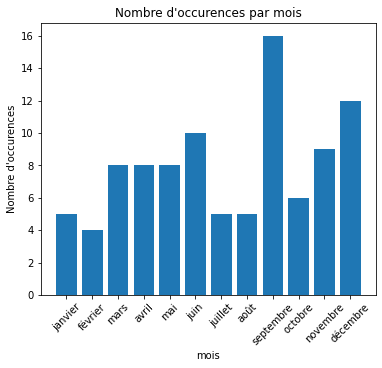

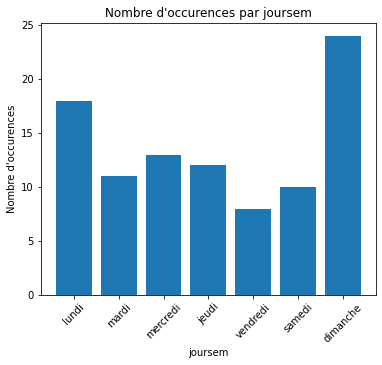

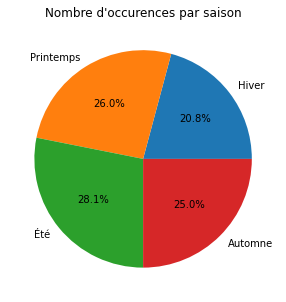

In [74]:
# TP - 2023 - wikipedia

    